<a href="https://colab.research.google.com/github/thanadolch/data_viz/blob/main/HW10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time

In [3]:
path = '/content/drive/My Drive/DVZ'

In [4]:
search_request = pd.read_csv(os.path.join(path,'search_request.csv'))
search_request.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [5]:
search_request['search_timestamp'] = [i.strftime('%Y-%m-%d') if isinstance(i,datetime) else i for i in search_request['search_timestamp']]
type(search_request.iloc[2,2])

str

In [6]:
search_request['search_timestamp'] = pd.to_datetime(search_request['search_timestamp'],format ='%Y/%m/%d %H:%M:%S.%f',errors='coerce')
search_request.head()

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [7]:
type(search_request.iloc[2,2])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
times = search_request['search_timestamp'].dt.time

In [9]:
type(times[2])

datetime.time

In [10]:
search_request['times'] = times

In [11]:
from datetime import time

In [12]:
search1 = search_request[search_request['times'] >= time(hour=11,minute=00,second=00)]
search2 = search1[search1['times'] < time(hour=12,minute=00,second=00)]
search3 = search_request[search_request['times'] >= time(hour=23,minute=00,second=00)]
search23 = search3[search3['times'] <= time(hour=23,minute=59,second=59)]

In [29]:
if search2["search_timestamp"].count() > search23["search_timestamp"].count():
    word = 'มากกว่า'
elif search2["search_timestamp"].count() < search23["search_timestamp"].count():
    word ='น้อยกว่า'
else :
    word = 'เท่ากับ'

In [31]:
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 11:00น.-11:59น. เท่ากับ {search2["search_timestamp"].count()} ครั้ง ซึ่ง{word}จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 23:00น.-23:59น. เท่ากับ {search23["search_timestamp"].count()} ครั้ง ซึ่งต่างกันเท่ากับ {abs(search2["search_timestamp"].count() - search23["search_timestamp"].count())}'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 11:00น.-11:59น. เท่ากับ 738397 ครั้ง ซึ่งมากกว่าจำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 23:00น.-23:59น. เท่ากับ 278459 ครั้ง ซึ่งต่างกันเท่ากับ 459938'

#inline

In [33]:
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 11:00น.-11:59น. เท่ากับ {search2["search_timestamp"].count()} ครั้ง ซึ่ง{"มากกว่า" if search2["search_timestamp"].count() > search23["search_timestamp"].count() else "น้อยกว่า"} จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 23:00น.-23:59น. เท่ากับ {search23["search_timestamp"].count()} ครั้ง ซึ่งต่างกันเท่ากับ {abs(search2["search_timestamp"].count() - search23["search_timestamp"].count())}'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 11:00น.-11:59น. เท่ากับ 738397 ครั้ง ซึ่งมากกว่า จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 23:00น.-23:59น. เท่ากับ 278459 ครั้ง ซึ่งต่างกันเท่ากับ 459938'

In [13]:
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 11:00น.-11:59น. เท่ากับ {search2["search_timestamp"].count()} ครั้ง'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 11:00น.-11:59น. เท่ากับ 738397 ครั้ง'

In [14]:
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 23:00น.-23:59น. เท่ากับ {search23["search_timestamp"].count()} ครั้ง'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ 23:00น.-23:59น. เท่ากับ 278459 ครั้ง'

In [15]:
monday_thuresday = search_request[search_request['search_timestamp'].dt.dayofweek <=3]
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ วันจันทร์-วันพฤหัสบดี เท่ากับ {monday_thuresday["search_timestamp"].count()} ครั้ง'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ วันจันทร์-วันพฤหัสบดี เท่ากับ 4220697 ครั้ง'

In [16]:
friday_sunday = search_request[search_request['search_timestamp'].dt.dayofweek >3]
f'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ วันศุกร์-วันอาทิตย์ เท่ากับ {friday_sunday["search_timestamp"].count()} ครั้ง'

'จำนวนครั้งในการค้นหาของช่วงเวลาตั้งแต่ วันศุกร์-วันอาทิตย์ เท่ากับ 5783659 ครั้ง'

In [17]:
day_of_week = search_request['search_timestamp'].dt.dayofweek
search_request['day_of_week'] = day_of_week

In [18]:
graph = search_request.groupby('day_of_week')['search_timestamp'].count()

Text(0.5, 1.0, 'Number of each day of week')

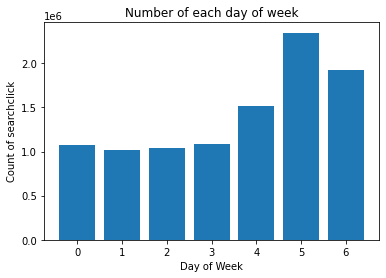

In [19]:
GG = pd.DataFrame(graph)
GG['day_of_week'] = [0,1,2,3,4,5,6]
plt.bar(GG['day_of_week'],GG['search_timestamp'])
plt.ylabel('Count of searchclick')
plt.xlabel('Day of Week')
plt.title('Number of each day of week')

In [20]:
adout = []
for i in search_request['day_of_week']:
    if i <=3 :
        dr =1
    elif i > 3:
        dr =2
    adout.append(dr)

In [21]:
search_request['password'] = adout

In [22]:
rt = search_request.groupby('password')['search_timestamp'].count()
table = pd.DataFrame(rt)
table['group'] = ['mon-thu','fri-sun']

Text(0.5, 1.0, 'Number of each day of week')

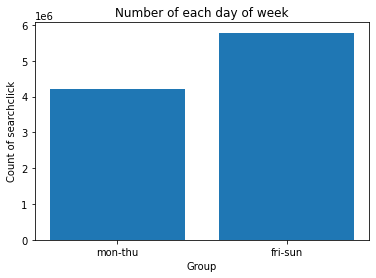

In [23]:
plt.bar(table['group'],table['search_timestamp'])
plt.ylabel('Count of searchclick')
plt.xlabel('Group')
plt.title('Number of each day of week')

In [24]:
times_pair = pd.concat([search2,search23])
times_pair

,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long,times
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88,11:19:22.404000
6,6,3ecf13ba-be4d-4eb9-9374-a1cca09d1614,2018-06-22 11:26:40.836,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone8,4; iOS;...",ผัดไท,NaN,1m91ertp1g9a09agkl7dqtej30,17,12.4511,102.249,11:26:40.836000
15,15,abbf59dd-9631-4b3d-aa57-0bebda18b039,2018-06-22 11:48:00.258,"Wongnai/10.0 (iPhone10,6; iOS; 11.4; en_TH@cal...",yum & tum,6967.0,668o57pjfa8tpp19ob5de4be8t,14,13.7209,100.527,11:48:00.258000
16,16,4cda5a26-93a8-4e5c-85ce-7895646bde8c,2018-06-22 11:51:55.019,"Wongnai/8.17.5 (iPhone9,4; iOS; 11.4; en_TH@ca...",Godiva,71411.0,1b47msi6le9ci8nltjo817m443,10,13.7483,100.54,11:51:55.019000
36,36,7647c7f2-02d3-4475-b207-fb7ca3daba90,2018-06-18 11:48:21.744,"Wongnai/8.17.5 (iPhone9,4; iOS; 11.4; en_TH;)",ชานมไข่มุก square one,22432.0,5gbhu646p89t2rvm9t9026h6dj,11,13.719,100.52,11:48:21.744000
...,...,...,...,...,...,...,...,...,...,...,...
10003293,10004166,c2671f83-e92a-4252-9d21-2fd898271f9b,2018-06-15 23:09:43.328,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,22kfoqlo0u90ur84b19nt201lg,22,NaN,NaN,23:09:43.328000
10003310,10004183,bebb851e-1e8f-44db-8506-ccbb885beb79,2018-06-15 23:09:48.517,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,trmfmbb4v8i8qpj2c8ec1r73c,22,NaN,NaN,23:09:48.517000
10003318,10004191,ac9d3a26-d3fb-4525-aae1-19eed4436b72,2018-06-15 23:26:20.494,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,NaN,5s15ptlf328j795ha8abd28a9f,22,NaN,NaN,23:26:20.494000
10003337,10004210,7a6c52a4-3976-44e2-aa23-1349fd299454,2018-06-15 23:41:48.134,okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-...,NaN,92807.0,116oc2qtqc9psptj9tu02e8tfl,22,NaN,NaN,23:41:48.134000


In [25]:
adout1 = []
for i in times_pair['times']:
    if i < time(hour=12,minute=00,second=00) :
        dr =1
    elif i > time(hour=12,minute=00,second=00) :
        dr =2
    adout1.append(dr)

In [26]:
times_pair['group_times'] = adout1
times_pair.head()
pair_times = times_pair.groupby('group_times')['search_timestamp'].count()
pt = pd.DataFrame(pair_times)
pt['group_times'] = ['11:00-11.59','23:00-23.59']

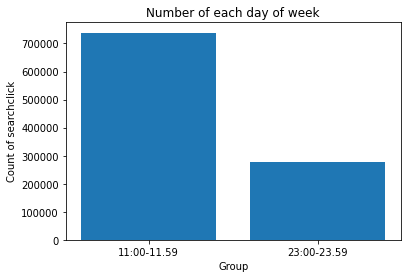

<function matplotlib.pyplot.legend>

In [27]:
plt.bar(pt['group_times'],pt['search_timestamp'])
plt.ylabel('Count of searchclick')
plt.xlabel('Group')
plt.title('Number of each day of week')
plt.show()
plt.legend

In [28]:
Group_webside = search_request.groupby('user_agent')['search_timestamp'].count().sort_values(ascending=False)
table_group_webside = pd.DataFrame(Group_webside)
table_group_webside[table_group_webside['search_timestamp']>100]

,search_timestamp
user_agent,
okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-N950F,142490
okhttp/3.9.0;WongnaiAndroid 8.16.5.1;samsung;SM-N950F,125077
"Wongnai/10.0 (iPhone9,4; iOS; 11.4; th_TH;)",81524
okhttp/3.9.0;WongnaiAndroid 8.16.6;samsung;SM-N920C,74557
okhttp/3.9.0;WongnaiAndroid 8.16.7.1;samsung;SM-N950F,72845
...,...
"Wongnai/8.15.4 (iPhone8,1; iOS; 11.4; th_TH;)",101
"Wongnai/8.17 (iPhone9,4; iOS; 11.3.1; en_TH@calendar=gregorian;)",101
okhttp/3.9.0;WongnaiAndroid 8.16.7.1;HUAWEI;PE-TL10,101
